Matrix math
Supervised learning – the model is trained on labeled data (input with the correct output provided)  
Unsupervised learning – the model is trained on unlabeled data (only input data, no output labels)  
Coefficient = mekadem  
Line equation – slope and intercept  
Ŷ (prediction) vs. Y (true value)  
Residuals – difference between prediction and actual value  
Feature – measurement on one scale (X), independent variable [e.g., house size]  
Label / Target (Y value) – dependent variable, the value to predict [e.g., house price]  
Normal equation  
bias (𝑏) is a constant that shifts the output of the model

correlation = a measure of how much two things change together  

Overfitting – when a model learns the training data too well, including noise and random fluctuations, 
so it performs great on training data but poorly on new/unseen data  

Underfitting – when a model is too simple to capture the underlying pattern in the data,  
so it performs poorly on both training and new data  

**evaluation:**  
R²  
how much of the changes in your target (Y) your model can explain using the features (X)  
100% (R² = 1) → The model perfectly explains the data  
0% (R² = 0) → The model explains nothing better than just guessing the average  
Higher is better, but it can be misleading  

Adjusted R²  
Same as R², but it penalizes you for adding useless features  
If you add a feature that helps, Adjusted R² will go up  
If you add a feature that doesn’t help, Adjusted R² will go down  
usually between 0-1, can be negative - which means bad model, better just to take the avg  
scale = to normal a distance i.e. between 0-1  

**train**  
X_train, X_test, y_train, y_test  
X_train = X features used in train (i.e. room, floor...)  
y_train = Y label used in train (i.e. app price)  
X_test = X features used in test  
y_test = Y label used in test   

cost function = error rate

fit = train the model
evaluation of a model
R^2 0-1, Adj R^ 0-1

Gradient – the steepest slope vector pointing in the direction of the greatest increase  
Gradient descent – the opposite direction of the gradient, the path of steepest descent  
Learning rate – the step size taken in each iteration  

1 Linear regression – 1 X variable a straight line that minimizes the average of squared residual values  
2 Linear regression with multiple X variables  
3 Polynomail regression - 1 X  
4 Polynomail regression - multiple X



In [32]:


############################# with pipe-line 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Our data
training_hours = np.array([2, 3, 5, 7, 9, 12, 16, 20, 25, 30]).reshape(-1, 1)
running_times = np.array([95, 85, 70, 65, 60, 55, 50, 53, 58, 70])

# Create polynomial regression model (degree 2) -- see explanation below
polynomial_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Fit the model
polynomial_model.fit(training_hours, running_times)

print(polynomial_model.named_steps['poly'].get_feature_names_out(['x']))
print(polynomial_model.named_steps['linear'].coef_)
print(polynomial_model.named_steps['linear'].intercept_)

['1' 'x' 'x^2']
[ 0.         -5.711784    0.15938051]
100.04845297494242


Predicted running time: 50.23230725229783


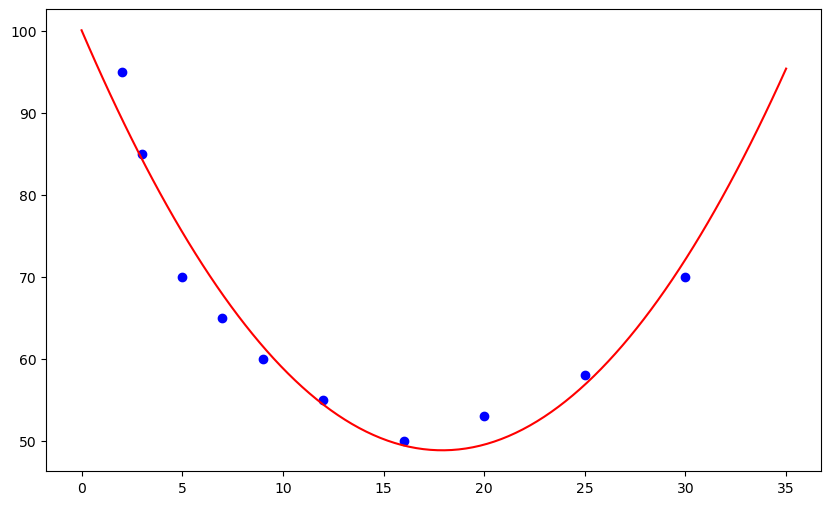

In [31]:


############################# without pipe-line 

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data
training_hours = np.array([2, 3, 5, 7, 9, 12, 16, 20, 25, 30]).reshape(-1, 1)
running_times = np.array([95, 85, 70, 65, 60, 55, 50, 53, 58, 70])

# Step 1: Transform features to polynomial form (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(training_hours)

# Step 2: Fit linear regression to the transformed features
model = LinearRegression()
model.fit(X_poly, running_times)

# Example: Predict for 15 training hours
hours = np.array([[15]])
hours_poly = poly.transform(hours)
predicted_time = model.predict(hours_poly)
print("Predicted running time:", predicted_time[0])

x_curve = np.linspace(0, 35, 100).reshape(-1, 1)
# y_curve = polynomial_model.predict(x_curve)  # pipeline
y_curve = model.predict(poly.transform(x_curve))

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(training_hours, running_times, color='blue', label='Data points')
plt.plot(x_curve, y_curve, color='red', label='Polynomial regression')